# Тема исследования: "Изучение взаимосвязей между количеством авиаперевозок по городам и авиаперевозок для разных моделей самолётов."

В нашем распоряжении имеются файлы, содержащие следующую информацию:
- /datasets/query_1.csv:
    - model — модели самолета
    - flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года

- /datasets/query_3.csv:
    - city — о городах
    - average_flights — о среднем количестве рейсов, прибывающих в город city за день в августе 2018 года
    
Для этих двух наборов данных нужно:
- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.

---

Импортируем полезные инструменты

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

Отключим ненужные предупреждения Питона

In [3]:
import warnings
warnings.filterwarnings('ignore')

Сбросим ограничения на демонстрацию количества столбцов, зададим максималное количество символов в каждой строке, а также округлим выведение значений типа float до двух знаков после запятой.

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 80)
pd.options.display.float_format = '{:,.2f}'.format

Импортируем библиотеку для получения запросов. Нам она пригодится при скачивании картинок 

In [5]:
import requests
from ipywidgets import Image

Откроем файлы с таблицами

In [6]:
df_air = pd.read_csv('query_1.csv')

In [7]:
df_city = pd.read_csv('query_3.csv')

Посмотрим на df_air

In [8]:
df_air

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [9]:
df_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [10]:
df_air.describe()

,flights_amount
count,8.00
mean,"2,035.62"
std,"1,965.20"
min,300.00
25%,605.25
50%,795.00
75%,"4,250.25"
max,"4,557.00"


Как мы можем убедиться, типы данных в представленной таблице вполне корректны. Количество рейсов для каждой модели самолетов model в сентябре 2018 года представлены целочисленным типом данных, а модель самолёта (model) - типом object. Всё корректно.

Теперь взглянем на df_city

In [11]:
df_city

,city,average_flights
0,Абакан,3.87
1,Анадырь,1.00
2,Анапа,2.16
3,Архангельск,5.35
4,Астрахань,2.45
...,...,...
96,Чита,1.58
97,Элиста,4.87
98,Южно-Сахалинск,4.29
99,Якутск,2.74


In [12]:
df_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [13]:
df_city.describe()

,average_flights
count,101.00
mean,5.49
std,13.12
min,1.00
25%,2.00
50%,3.00
75%,5.87
max,129.77


Опять же мы удостоверяемся в корректности приведённых типов данных.  Поскольку речь идёт именно о среднем количестве рейсов, прибывающих в город city за день в августе 2018 года, данные поневоле приобретают тип данных float. Названия городов имеют тип данных object. Типы данных корректны.

Посмотрим на топ-10 городов по количеству рейсов

In [14]:
top_city = df_city.sort_values(by='average_flights', ascending=False)

In [15]:
top_city.head(10)

,city,average_flights
43,Москва,129.77
70,Санкт-Петербург,31.16
54,Новосибирск,17.32
33,Красноярск,11.58
20,Екатеринбург,11.32
67,Ростов-на-Дону,10.19
63,Пермь,10.13
10,Брянск,10.00
74,Сочи,9.61
84,Ульяновск,9.58


Text(0, 0.5, 'Город')

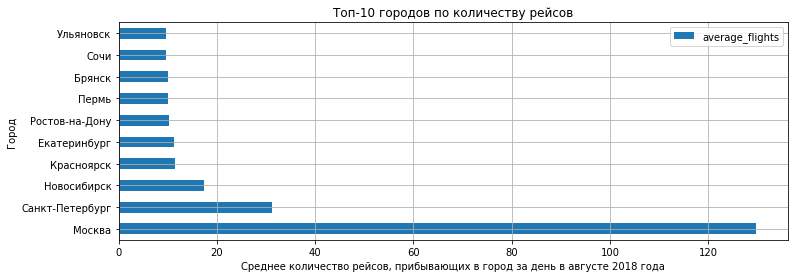

In [16]:
ax = top_city.head(10).plot(x='city', y='average_flights', kind='barh', grid=True, figsize=(12,4), ylim=(0, 150),\
    title='Топ-10 городов по количеству рейсов')
                                                             
plt.xlabel('Среднее количество рейсов, прибывающих в город за день в августе 2018 года')
plt.ylabel('Город')

Также посмотрим на все города со средними значениями по количеству рейсов

Text(0, 0.5, 'Город')

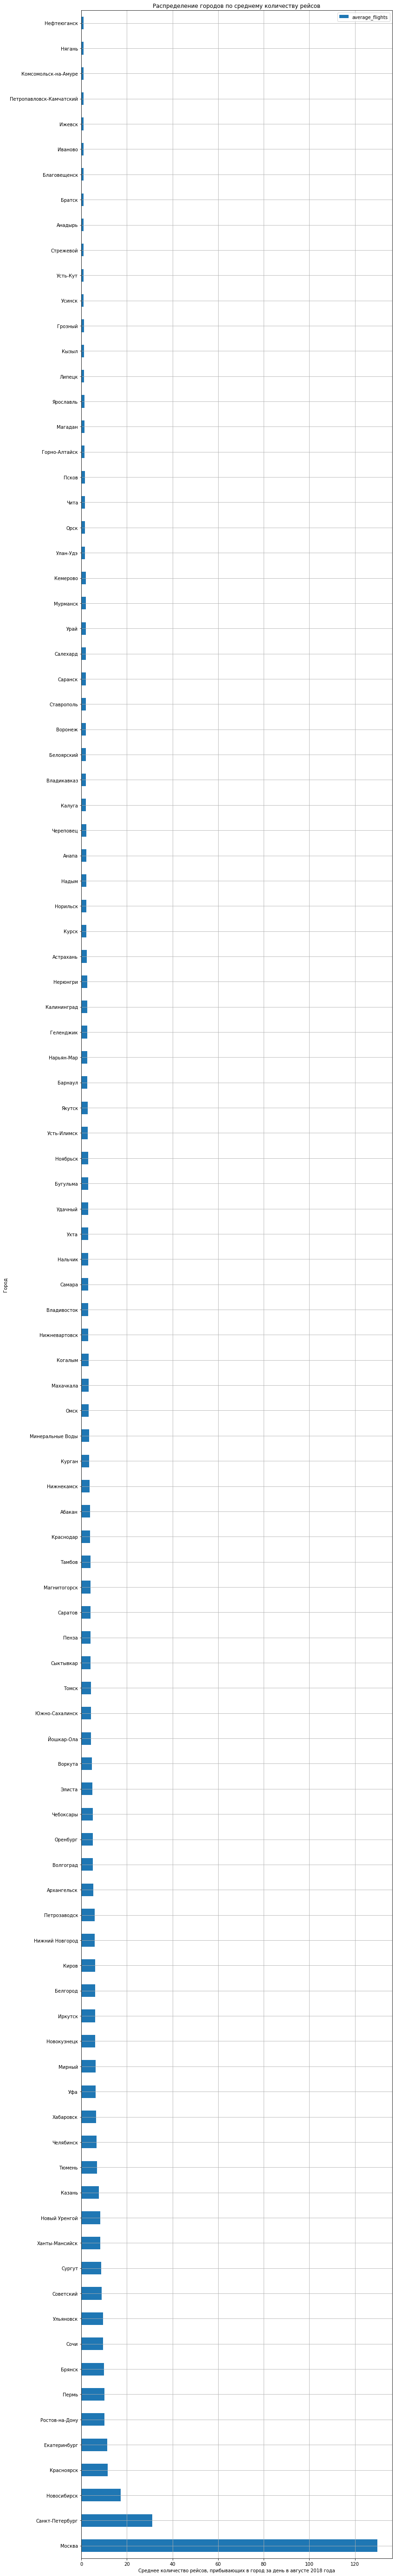

In [17]:
ax = top_city.plot(x='city', y='average_flights', kind='barh', grid=True, figsize=(12,101), ylim=(0, 150),\
    title='Распределение городов по среднему количеству рейсов')
                                                             
plt.xlabel('Среднее количество рейсов, прибывающих в город за день в августе 2018 года')
plt.ylabel('Город')

Посмотрим, соотносятся ли как-то полученные нами данные с городами-миллионниками, что было бы ожидаемо. Возьмём из открытых источников таблицу о городах-миллионниках за тот же 2018 год.

In [18]:
Image(value=requests.get('http://cdn01.ru/files/users/images/49/21/49215bbb804726af332bb7f138de1e3d.png').content)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02K\x00\x00\x025\x08\x00\x00\x00\x00\xe3\xfe\xe1o\x…

Как и следовало ожидать, Москва является лидером по среднесуточному количеству рейсов. Это столица, крупнейший транспортный хаб и т.п. Что также ожидаемо, на втором месте стоит Санкт-Петербург - вторая столица. Новосибирск, Екатеринбург, Ростов-на-Дону - попадает и в первую десятку городов-миллионников и в десятку с наибольшим среднесуточным количеством рейсов за август 2018. А вот дальше с городами из топовой десятки по количеству рейсов всё не так однозначно: 
- В Сочи меньше полумиллиона жителей - но при этом это один из популярнейших курортов России.
- Ульяновск и Брянск также не являются миллионниками, но не смотря на это они входят в 'Топ-10 городов по количеству рейсов'.
- Пермь и Красноярск являются миллионниками, но не входят в десятку из топа городов-миллионников.
- В топ-10 по рейсам входят по пересечению с фестивалями только Москва, Питер и Екатеринбург. При этом ни в Питере, ни в Екатеринбурге в рассматриваемый период фестивали не проходили.

Рассмотрим внимательнее количество авиаперевозок для разных моделей самолётов в сентябре 2018.

In [19]:
plane = df_air.sort_values(by='flights_amount', ascending=False)

In [20]:
plane

,model,flights_amount
6,Cessna 208 Caravan,4557
5,Bombardier CRJ-200,4446
7,Sukhoi SuperJet-100,4185
1,Airbus A321-200,960
2,Boeing 737-300,630
0,Airbus A319-100,607
3,Boeing 767-300,600
4,Boeing 777-300,300


Text(0, 0.5, 'Модель самолёта')

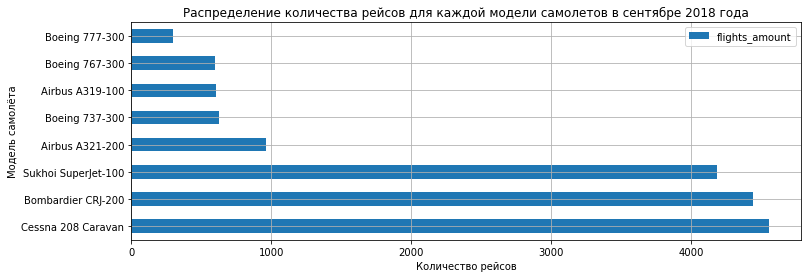

In [21]:
ax = plane.plot(x='model', y='flights_amount', kind='barh', grid=True, figsize=(12,4), ylim=(100, 4600),\
    title='Распределение количества рейсов для каждой модели самолетов в сентябре 2018 года')
                                                             
plt.xlabel('Количество рейсов')
plt.ylabel('Модель самолёта')

Как видим, на первом месте - «Сессна-208» (Сessna 208A Caravan, 208B Grand Caravan, Caravan Amphibian) — американский лёгкий одномоторный турбовинтовой самолёт общего назначения с неубирающимся шасси. Выпускается компанией «Сессна» с 1984 года в различных модификациях (пассажирские, грузопассажирские, грузовые, самолёт-амфибия). Используется на авиалиниях малой протяжённости.

Экипаж самолёта состоит из одного пилота (два пилота при выполнении коммерческих полётов по правилам полётов по приборам), базовая модель перевозит девять пассажиров (до 13 пассажиров + 1 пилот по разрешению FAA).

<img src=https://upload.wikimedia.org/wikipedia/commons/6/63/Cessna_Caravan_208_jump-mod.jpg>

На втором месте — Bombardier CRJ100 и CRJ200 — семейство региональных самолётов, производимых канадской компанией Bombardier и основанных на бизнес-джете Canadair Challenger.. Успешная модель CRJ-100 в 1995 году была модернизирована в CRJ-200 — самолёту поставили новые, более экономичные двигатели General Electric CF34-3B1. CRJ-200 имеют повышенные эксплуатационные характеристики: данный тип способен выполнять полёты в сложных метеорологических условиях и в условиях высокогорных аэродромов. Пятидесятиместный комфортабельный салон, оборудованный удобными кожаными креслами, благодаря имеющимся инженерно-техническим решениям, может легко быть переоборудован в полный эконом или бизнес/эконом класс.

<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/7/7f/N466SW_LAX_%2830314755488%29.jpg/1280px-N466SW_LAX_%2830314755488%29.jpg>

Замыкает тройку лидеров по рейсам - Sukhoi Superjet 100 (рус. Сухой Суперджет 100) — российский ближнемагистральный узкофюзеляжный пассажирский самолёт, предназначенный для перевозки от 87 до 108 пассажиров на дальность 3050 или 4600 км. Разработан компанией «Гражданские самолёты Сухого» при участии ряда иностранных компаний.

<img src=https://upload.wikimedia.org/wikipedia/commons/4/40/Armavia_Sukhoi_Superjet_Heisterkamp.jpg>

Оставшиеся места распределяются между различными версиями моделей Airbus и Boeing. 

# Выводы:

- Москва является лидером по среднесуточному количеству рейсов - 129.77. 
- На втором месте стоит Санкт-Петербург - 31.16. 
- Новосибирск замыкает тройку лидеров со среднесуточными показателями, равными - 17.32.
- Оставшиеся семь городов (Екатеринбург, Ростов-на-Дону, Сочи, Ульяновск, Брянск, Пермь и Красноярск) имеют незначительные отличия друг от друга в среднесуточном количестве рейсов - максимальная разбежность - 2 рейса.
- Критерий, по которому именно эти города попали в топ-10 не до конца ясен. С фестивалями или наличием статуса города-миллионника среднесуточное количество рейсов связано слабо. Не мешало бы подробнее проработать этот вопрос для того, чтоб в будущем можно было более прицельно прогнозировать трафики.
---
- Можно выделить следующую тройку лидеров среди моделей самолётов:
    - Cessna 208 Caravan  -	4557 рейсов;
    - Bombardier CRJ-200  -	4446 рейсов;
    - Sukhoi SuperJet-100 -	4185 рейсов.
- Оставшиеся модели (Airbus и Boeing разных модификаций) имеют количество рейсов от 960 до 300.

- По количеству перевозимых пассажиров Cessna 208 Caravan существенно уступает оставшимся двум лидерам. Эта модель перевозит не более 13 пассажиров (в базовой комплектации). Cessna 208 Caravan = 13(пассажировместимость) * 4557(рейсов) = 59 241 человек потенциально могло быть перевезено;
- Если исходить из максимально возможной пассажировместимости оставшейся двойки, то:
    - Bombardier CRJ-200 = 50(пассажировместимость) * 4446(рейсов) = 222 300 человек потенциально могло быть перевезено;
    - Sukhoi SuperJet-100 = 108(пассажировместимость) * 4185(рейсов) = 451 980 человек потенциально могло быть перевезено
    